<a href="https://colab.research.google.com/github/mb8655/Python/blob/main/Multidimensional_Data_Analysis-Normalizing_Raw_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multidimensional data analysis


In [ ]:
# Install the SQLAlchemy library if it is not installed


!sudo pip3 install -U -q PyMySQL sqlalchemy sql_magic

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Make the graphs a bit prettier, and bigger
#matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (15, 7)

In [ ]:
# create connection to mysql

conn_string_fb = 'mysql+pymysql://{user}:{password}@{host}:{port}/{db}'.format(
    user='student',
    password='dwdstudent2025',
    host='db.ipeirotis.org',
    port=3306,
    db='facebook')
engine_fb = create_engine(conn_string_fb)

##Multidimesnional data analysis: From raw counts to percentages
Now let's run a query to get the political views of Facebook users, broken down by gender.

In [ ]:
# Query and df creation
polviews_by_gender = '''
SELECT Sex, PoliticalViews, COUNT(*) AS cnt
FROM Profiles
WHERE Sex IS NOT NULL AND PoliticalViews IS NOT NULL
GROUP BY Sex, PoliticalViews
ORDER BY  PoliticalViews, Sex
'''

df = pd.read_sql(polviews_by_gender, con=engine_fb)
df

,Sex,PoliticalViews,cnt
0,Female,Apathetic,309
1,Male,Apathetic,462
2,Female,Conservative,428
3,Male,Conservative,474
4,Female,Liberal,4054
5,Male,Liberal,2196
6,Female,Libertarian,113
7,Male,Libertarian,196
8,Female,Moderate,1444
9,Male,Moderate,1379


In [ ]:
#review the datatypes
df.dtypes

,0
Sex,object
PoliticalViews,object
cnt,int64


<Axes: >

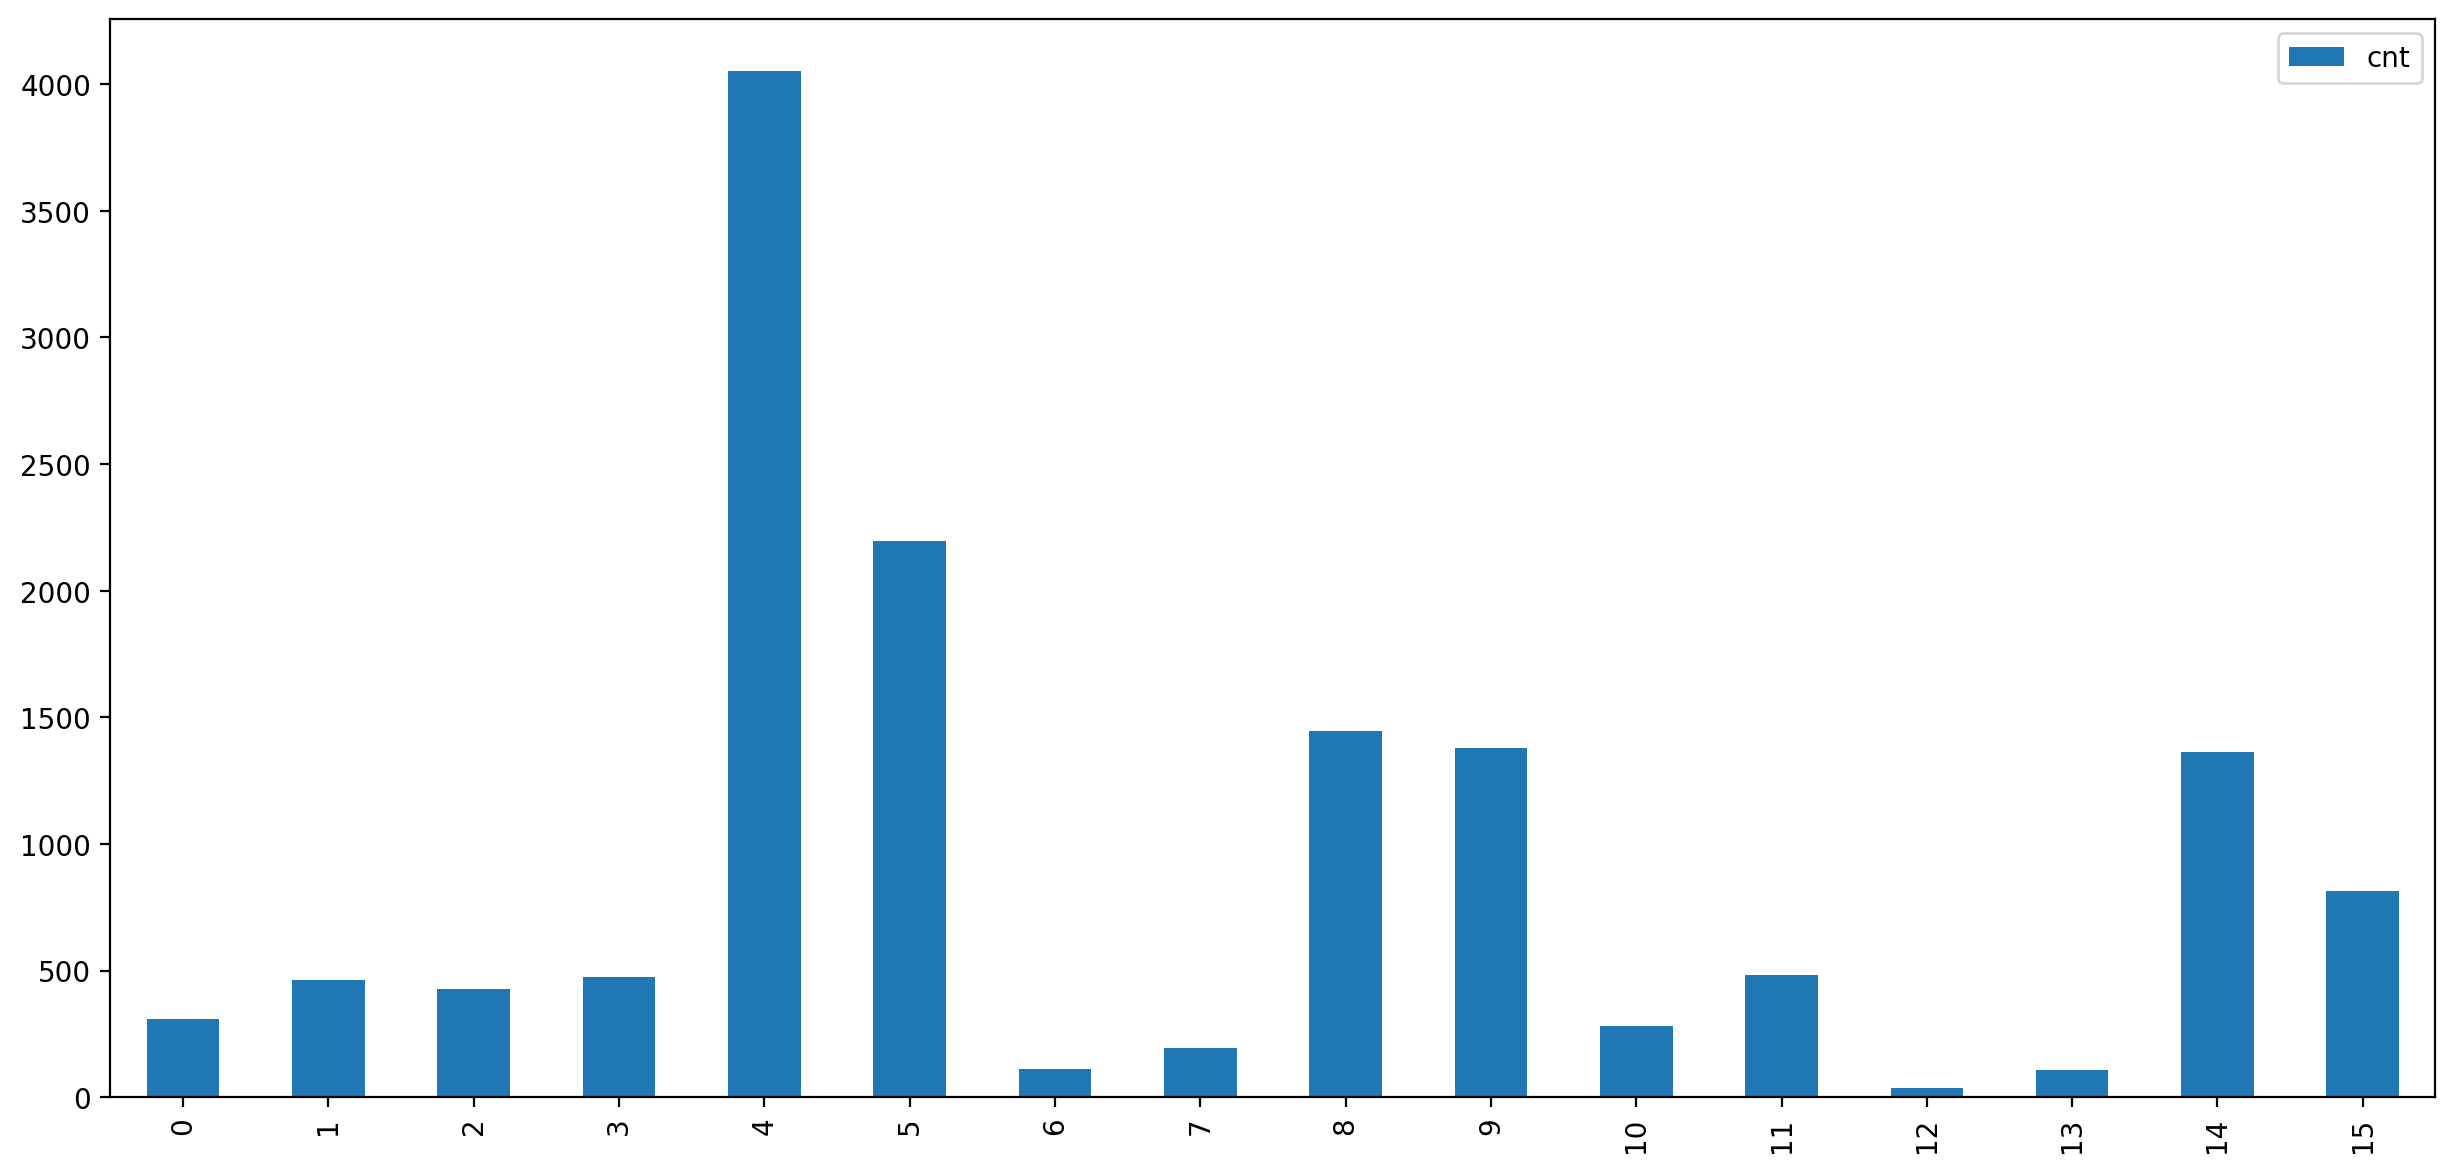

In [ ]:
# Let's plot this!
# Bleh, this is ugly...
# Remember that the index of the dataframe becomes the default x-axis
df.plot(kind='bar')

In [ ]:
# Pivot, baby!
# Now the index contains the Political Views, which will be our x-axis
dfp = pd.pivot_table(
    data = df,
    index='PoliticalViews',
    columns='Sex',
    values='cnt',
    aggfunc='sum'
)
dfp

Sex,Female,Male
PoliticalViews,,
Apathetic,309,462
Conservative,428,474
Liberal,4054,2196
Libertarian,113,196
Moderate,1444,1379
Other,280,482
Very Conservative,38,107
Very Liberal,1362,813


##convert the PoliticalViews column into an ordered Categorical variable. This is not strictly necessary, but it will be useful later. It ensures that Political Views appear in an order according to their political spectrum, as opposed to alphabetical.

In [ ]:
df.PoliticalViews = pd.Categorical(df.PoliticalViews,
    categories = ['Very Liberal', 'Liberal', 'Moderate', 'Conservative',
                  'Very Conservative', 'Libertarian', 'Apathetic', 'Other'],
    ordered=True
)

dfp = pd.pivot_table(data = df, index='PoliticalViews', columns='Sex',
                     values='cnt', aggfunc='sum')
dfp

<ipython-input-9-4b56e39b2cf2>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dfp = pd.pivot_table(data = df, index='PoliticalViews', columns='Sex',


Sex,Female,Male
PoliticalViews,,
Very Liberal,1362,813
Liberal,4054,2196
Moderate,1444,1379
Conservative,428,474
Very Conservative,38,107
Libertarian,113,196
Apathetic,309,462
Other,280,482


<Axes: xlabel='PoliticalViews'>

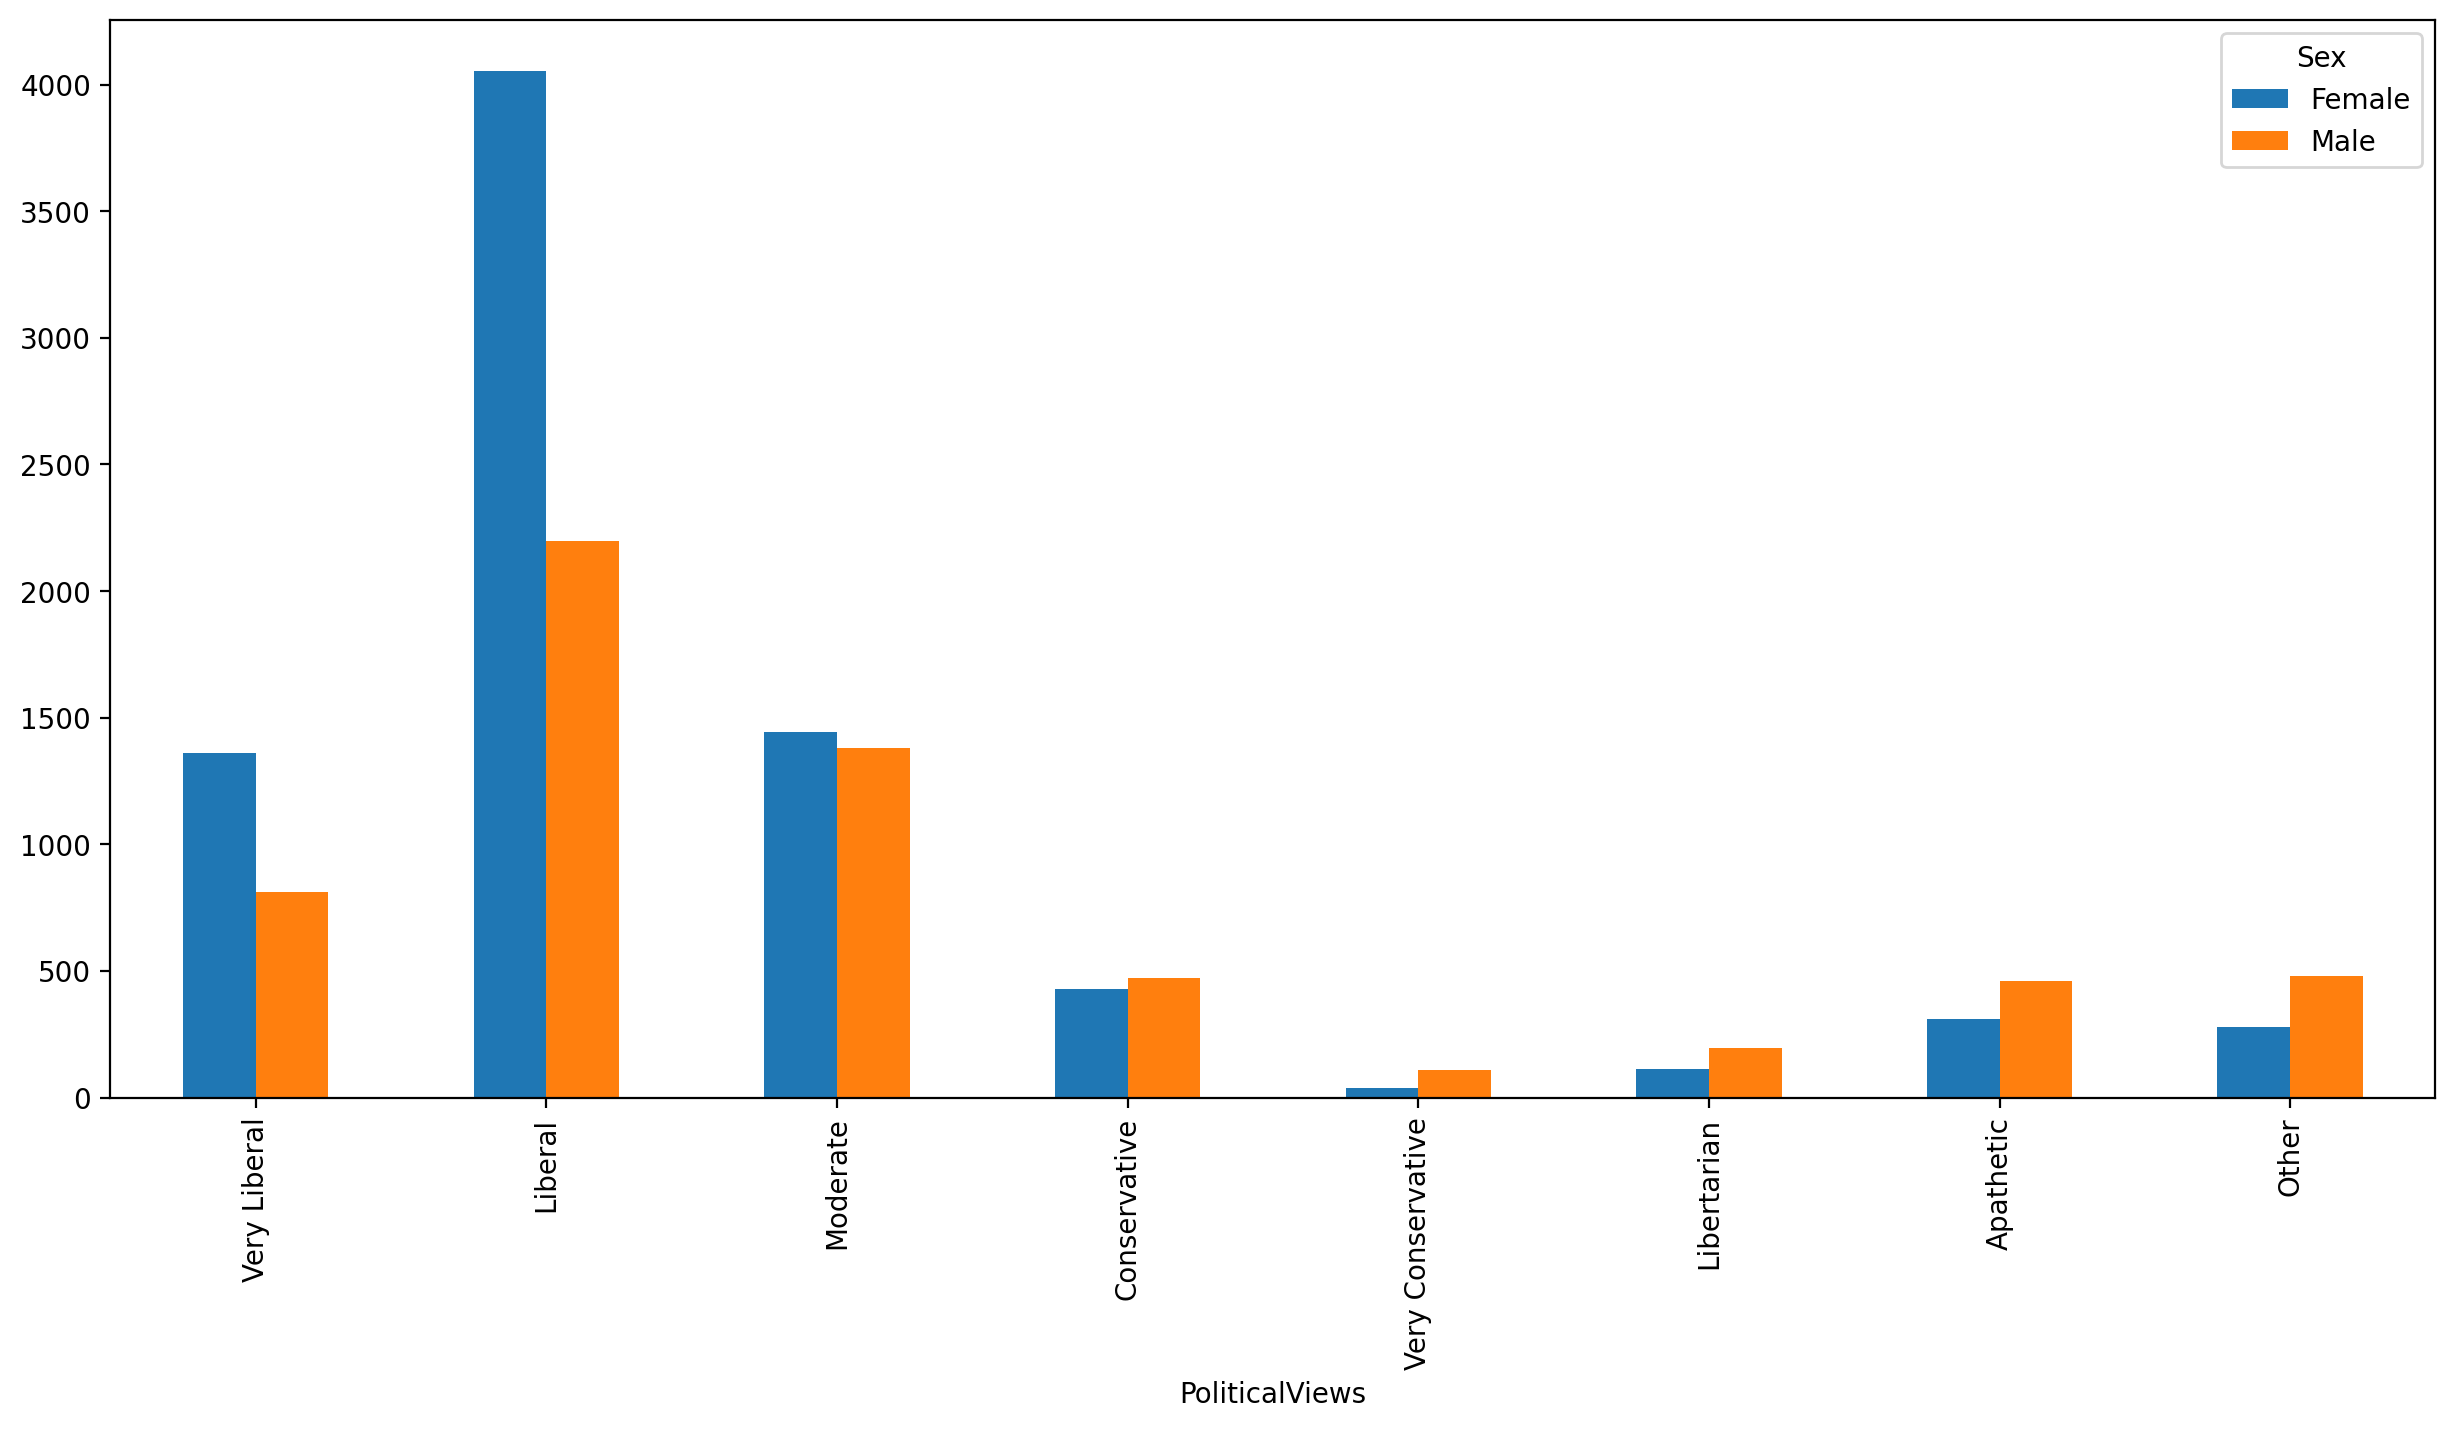

In [ ]:
dfp.plot(kind='bar')

#Normalizing values: From raw counts to percentages
Now, let's see a bit how we can normalize the values in Pandas, by performing operations on the columns and rows.

In [ ]:
# the .T is a shortcut for .transpose()
# and returns the transposed table
dfp.T

PoliticalViews,Very Liberal,Liberal,Moderate,Conservative,Very Conservative,Libertarian,Apathetic,Other
Sex,,,,,,,,
Female,1362,4054,1444,428,38,113,309,280
Male,813,2196,1379,474,107,196,462,482


In [ ]:
# sums the columns
dfp.sum()

# Equivalent commands:
# dfp.sum(axis='index')  # summing 'across the index'
# dfp.sum(axis=0)        # axis=0 is equivalent to summing axis='index'

,0
Sex,
Female,8028
Male,6109


In [ ]:
# Summing the transpose is same as
# summing the rows of the original
dfp.T.sum()

# Equivalent commands
# dfp.sum(axis='columns')
# dfp.sum(axis=1)

,0
PoliticalViews,
Very Liberal,2175
Liberal,6250
Moderate,2823
Conservative,902
Very Conservative,145
Libertarian,309
Apathetic,771
Other,762


In [ ]:
# Let's normalize the columns, as we have more females than males, and it seems that there are always more women
dfp_norm = dfp / dfp.sum()
# Columns (ie Sex) sum up to 1
dfp_norm

Sex,Female,Male
PoliticalViews,,
Very Liberal,0.169656,0.133082
Liberal,0.504983,0.359470
Moderate,0.179870,0.225733
Conservative,0.053313,0.077590
Very Conservative,0.004733,0.017515
Libertarian,0.014076,0.032084
Apathetic,0.038490,0.075626
Other,0.034878,0.078900


In [ ]:
# Instead of dfp / dfp.sum(), we can also use the .div() method, for dividing the entries with the sum()
# Note that, by definition, the dfp / dfp.sum() operation divides  column-wise, not row-wise.
# dfp_norm = dfp.div( dfp.sum(), axis='columns' )
# dfp_norm

<Axes: xlabel='PoliticalViews'>

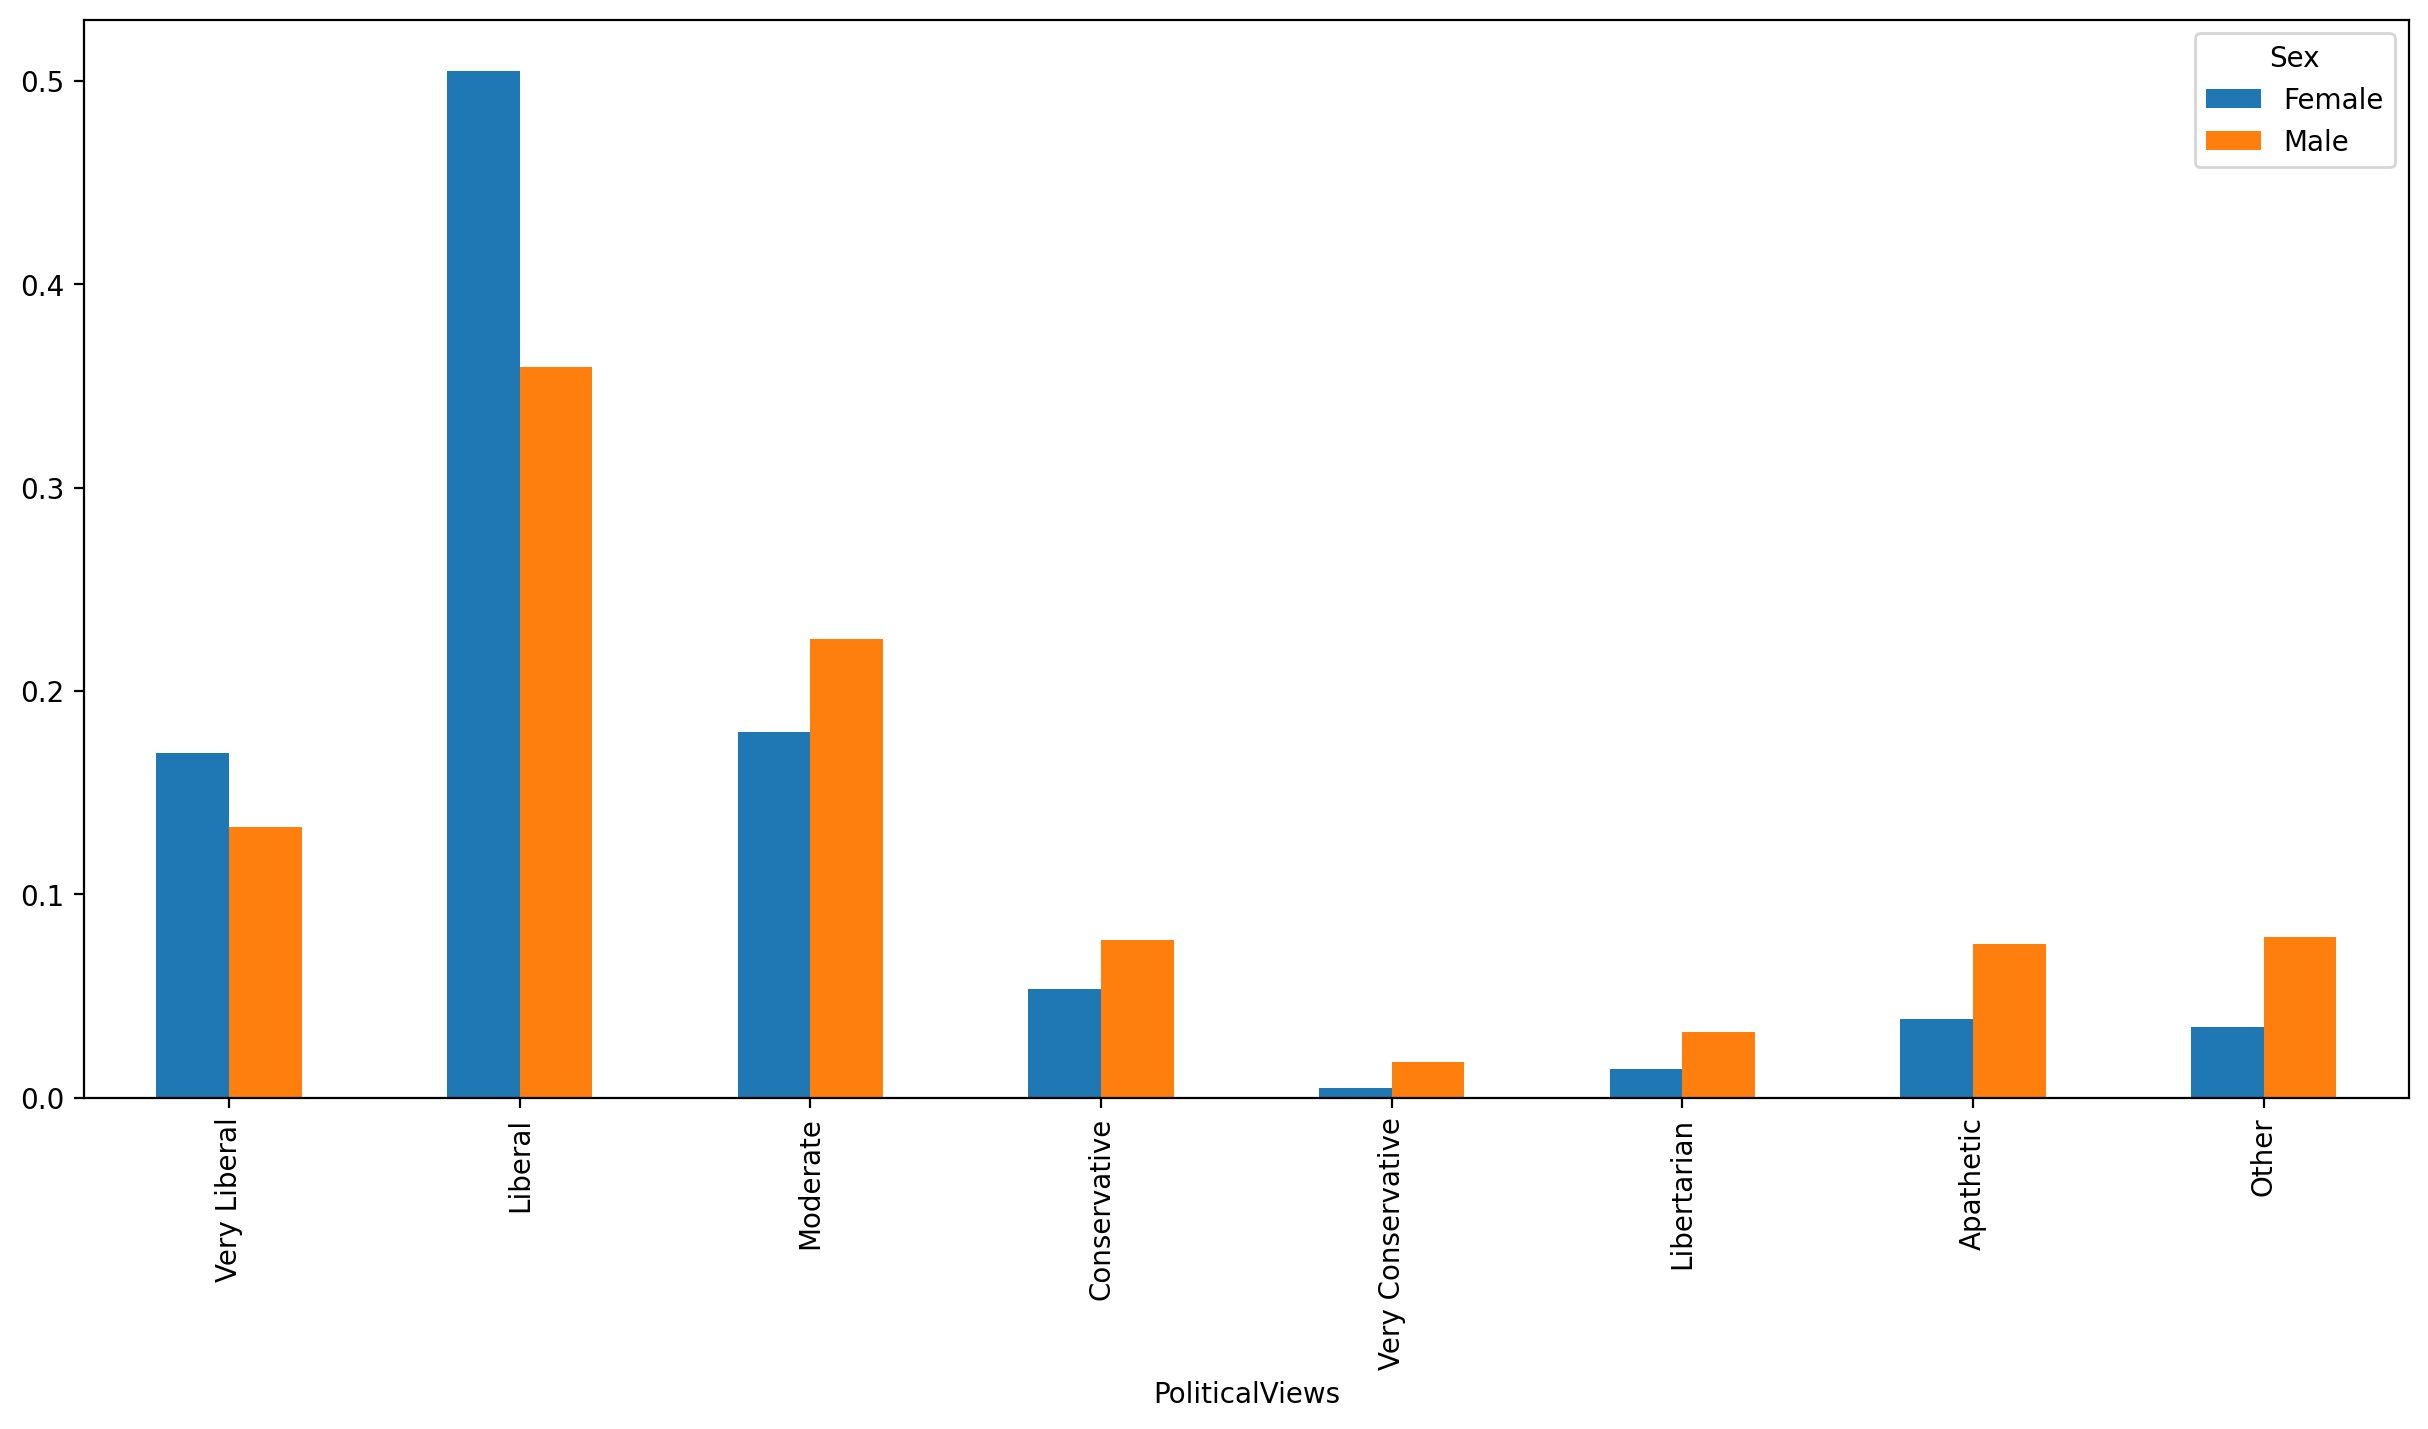

In [ ]:
#graph the norm data
dfp_norm.plot(kind='bar')


In [ ]:
# We will now normalize across the rows
dfp_norm2 = dfp.T / dfp.T.sum()
dfp_norm2.T

Sex,Female,Male
PoliticalViews,,
Very Liberal,0.626207,0.373793
Liberal,0.648640,0.351360
Moderate,0.511513,0.488487
Conservative,0.474501,0.525499
Very Conservative,0.262069,0.737931
Libertarian,0.365696,0.634304
Apathetic,0.400778,0.599222
Other,0.367454,0.632546


<Axes: xlabel='Sex'>

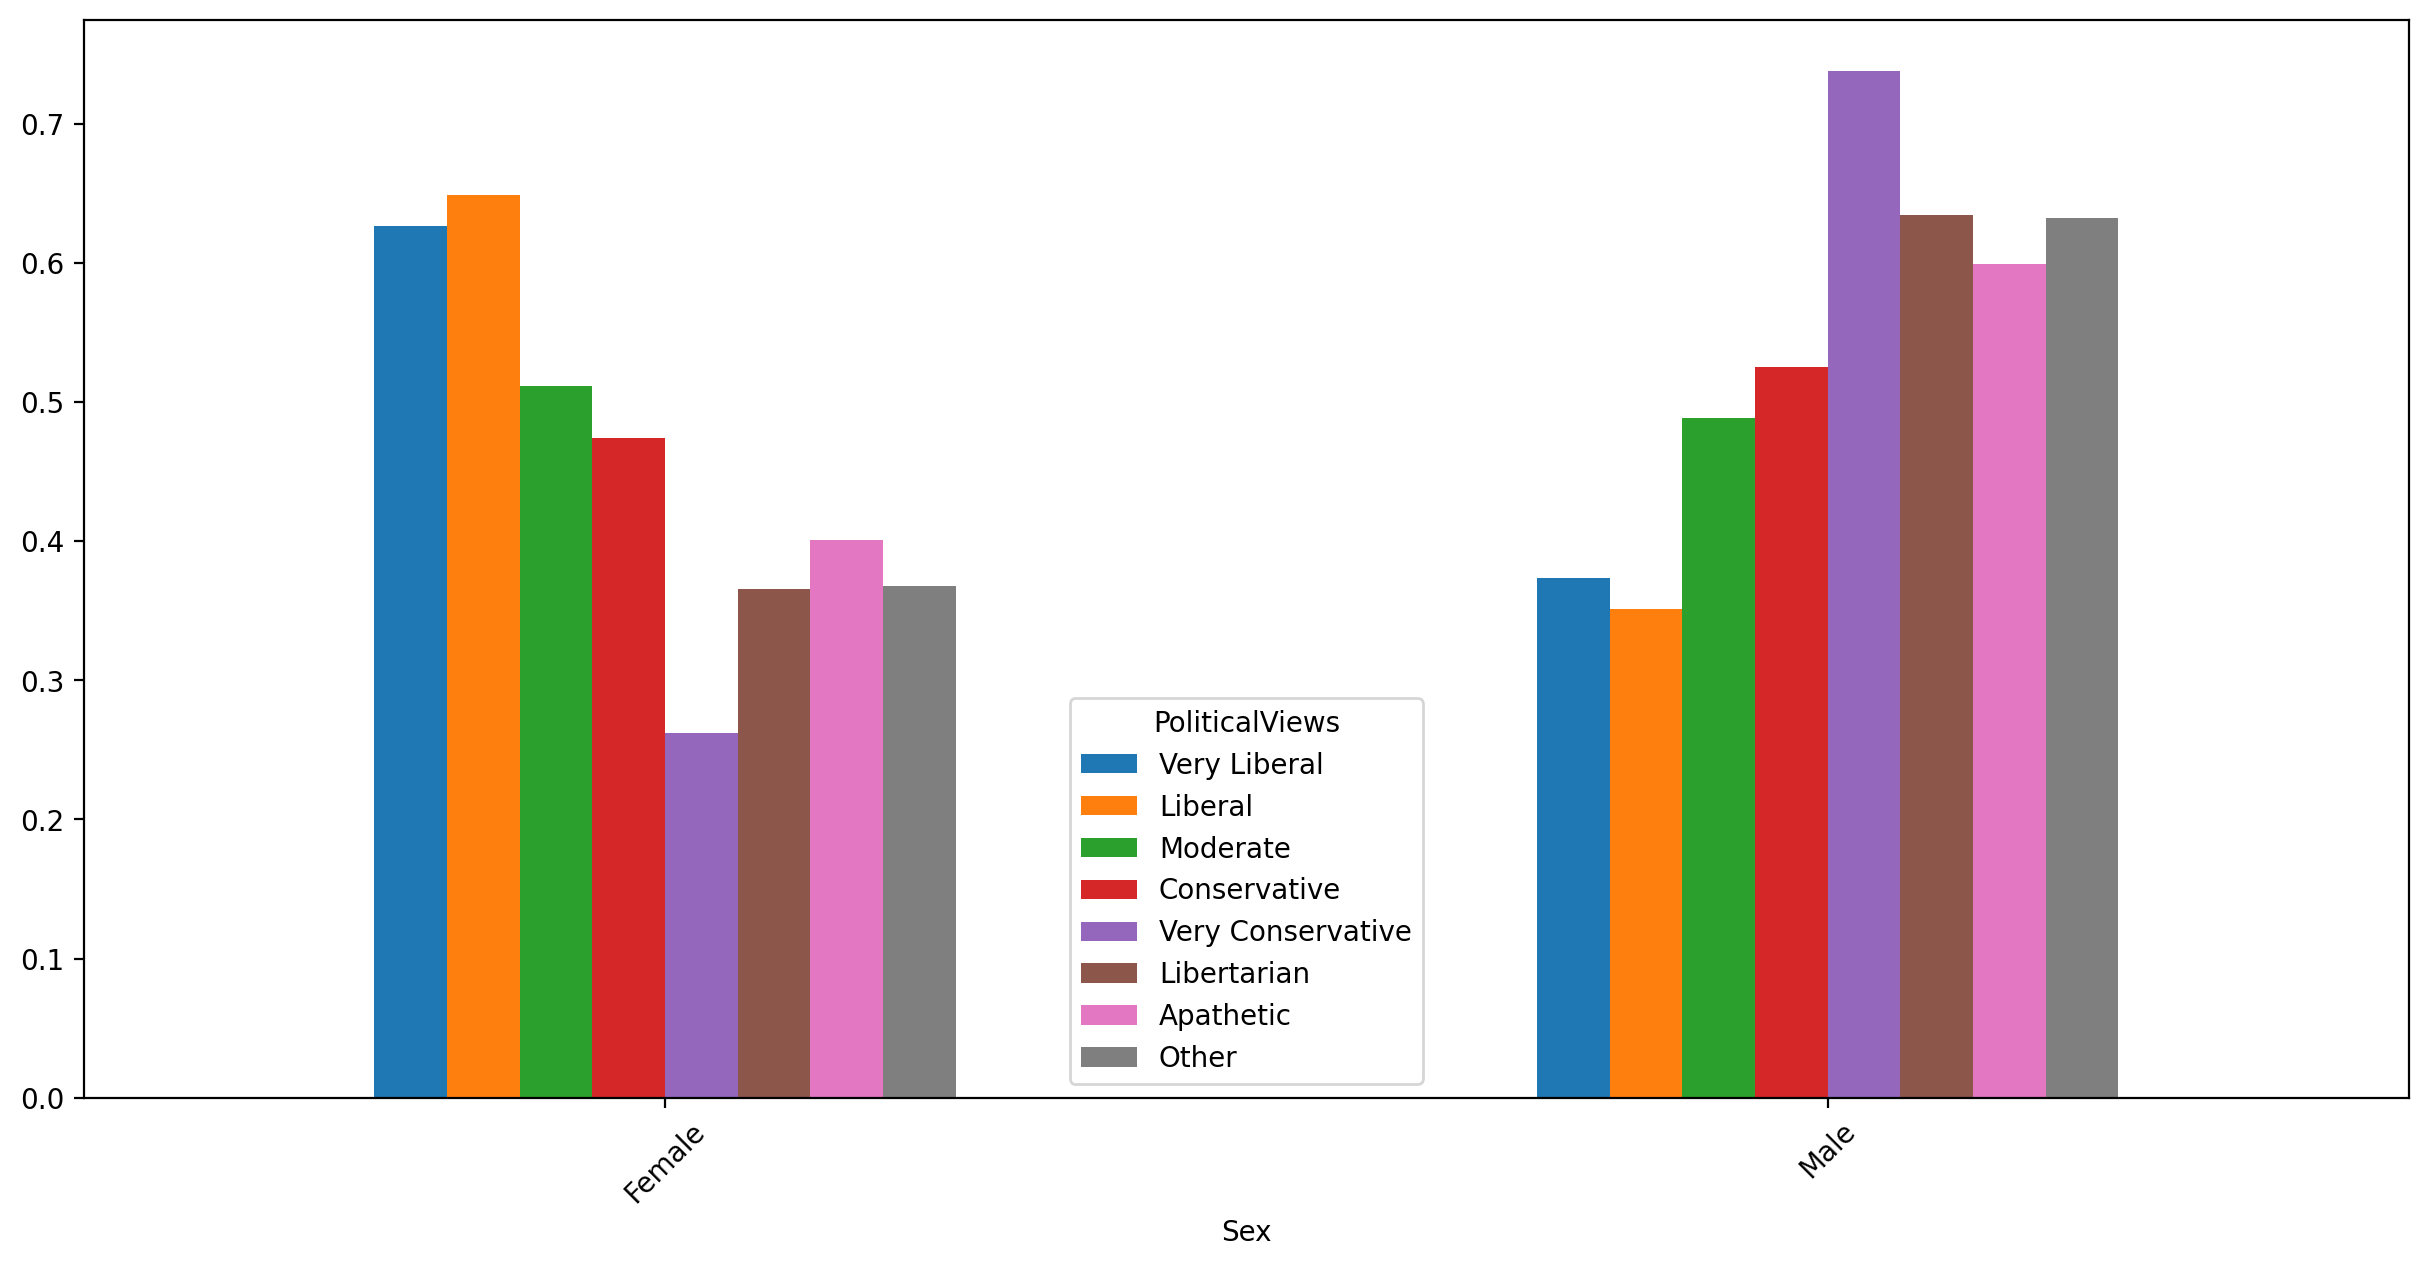

In [ ]:
# Same operation as above, but with the .div() function
# to find the fraction of males/females within each political category
# dfp_norm2 = dfp.div( dfp.sum(axis='columns'), axis='index' )
# dfp_norm2
dfp_norm2.plot(kind='bar', rot=45)

<Axes: xlabel='PoliticalViews'>

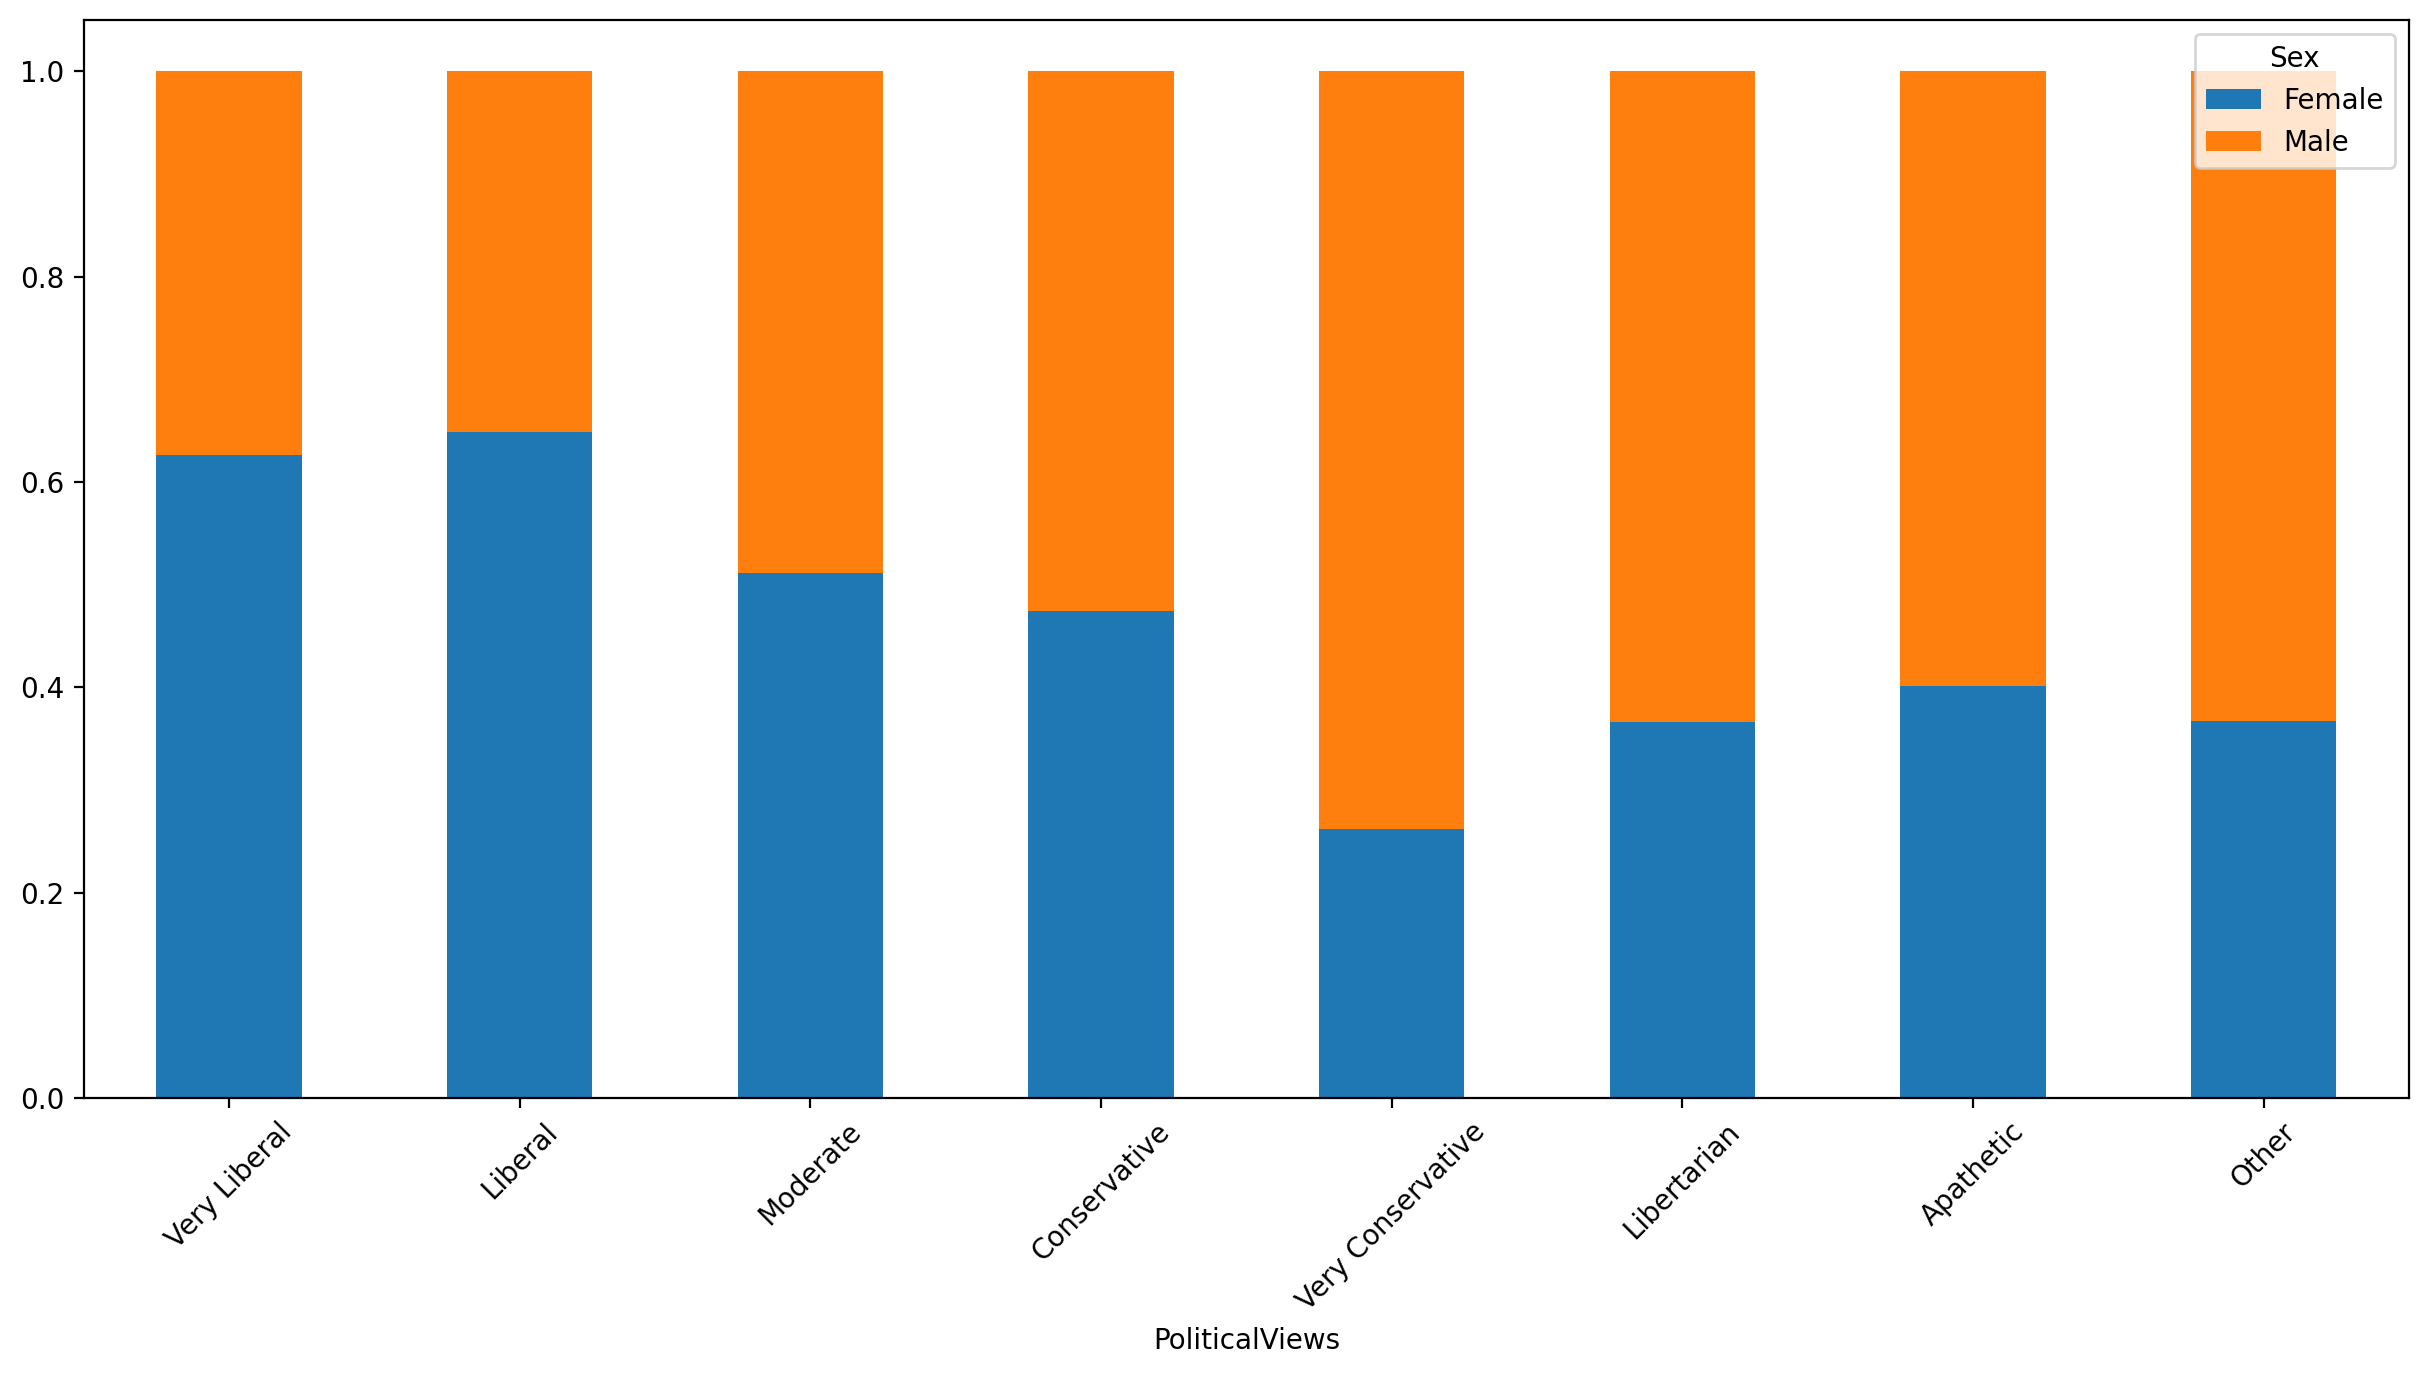

In [ ]:
dfp_norm2.T.plot(kind='bar', stacked=True, rot=45)


In [ ]:
##Use the tables RelationshipStatus and LookingFor, and show create a plot with a breakdown of what people in different relationship statuses are looking for. To make things more readable (and to practice a bit SQL), remove from the output all combinations that have less than 10 students in them. The plot can use the absolute counts.

b. Normalize the results and plot again. To get experience with normalization, try to normalize both by Status (eg "80% of the people who are in a relationship are looking for Friendship") and by Relationship Status (eg "70% of the people who are looking for Random Play are Single").

In [ ]:
#create query and df
query = '''
SELECT R.Status, L.LookingFor, COUNT(*) AS cnt
FROM Relationship R INNER JOIN LookingFor L ON R.ProfileID = L.ProfileID
GROUP BY R.Status, L.LookingFor
HAVING cnt>10
'''
df = pd.read_sql(query, con=engine_fb)
df

,Status,LookingFor,cnt
0,Single,Friendship,3453
1,Single,Dating,2177
2,Single,A Relationship,1706
3,Married,Friendship,793
4,Single,Whatever I can get,1357
5,Single,Random play,1373
6,In a Relationship,Friendship,2213
7,In a Relationship,Whatever I can get,255
8,Married,Dating,286
9,Married,A Relationship,210


In [ ]:
#create pivot
pivot = df.pivot_table(
    index='Status',
    columns='LookingFor',
    values='cnt'
)
pivot


LookingFor,A Relationship,Dating,Friendship,Random play,Whatever I can get
Status,,,,,
In a Relationship,72.0,88.0,2213.0,182.0,255.0
In an Open Relationship,74.0,99.0,201.0,149.0,107.0
Married,210.0,286.0,793.0,231.0,248.0
Single,1706.0,2177.0,3453.0,1373.0,1357.0


<Axes: ylabel='Status'>

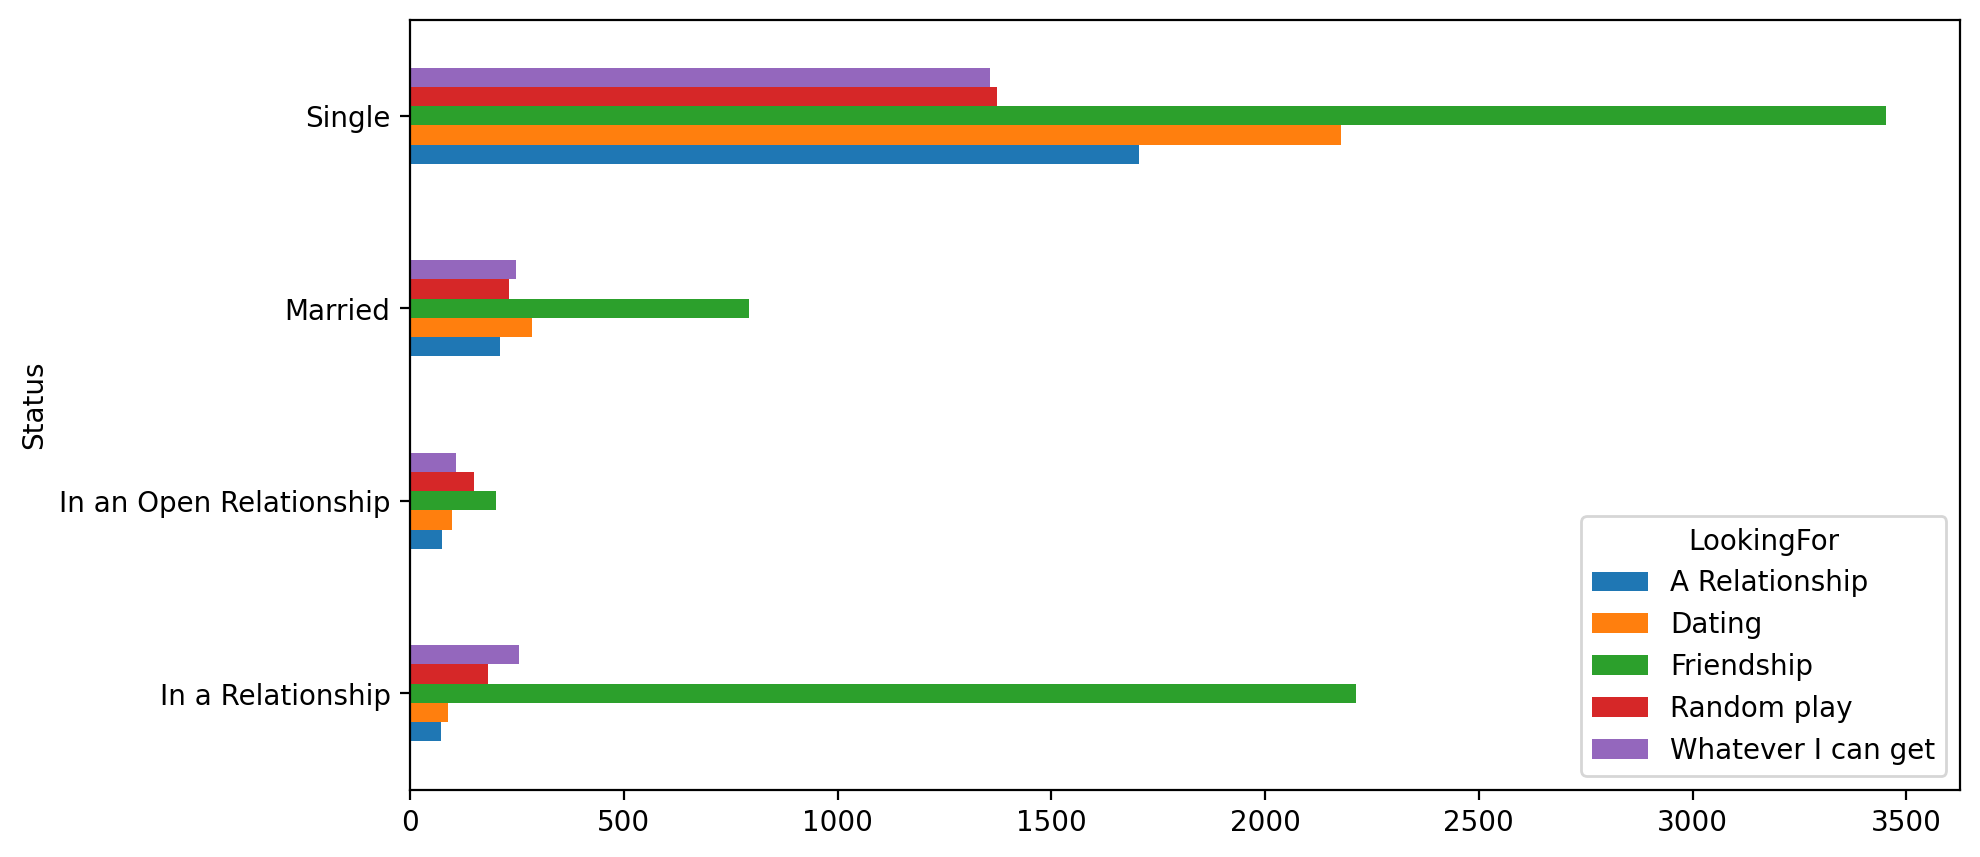

In [ ]:
# Raw numbers, by relationship status
pivot.plot(kind='barh', figsize=(10,5))

<Axes: ylabel='LookingFor'>

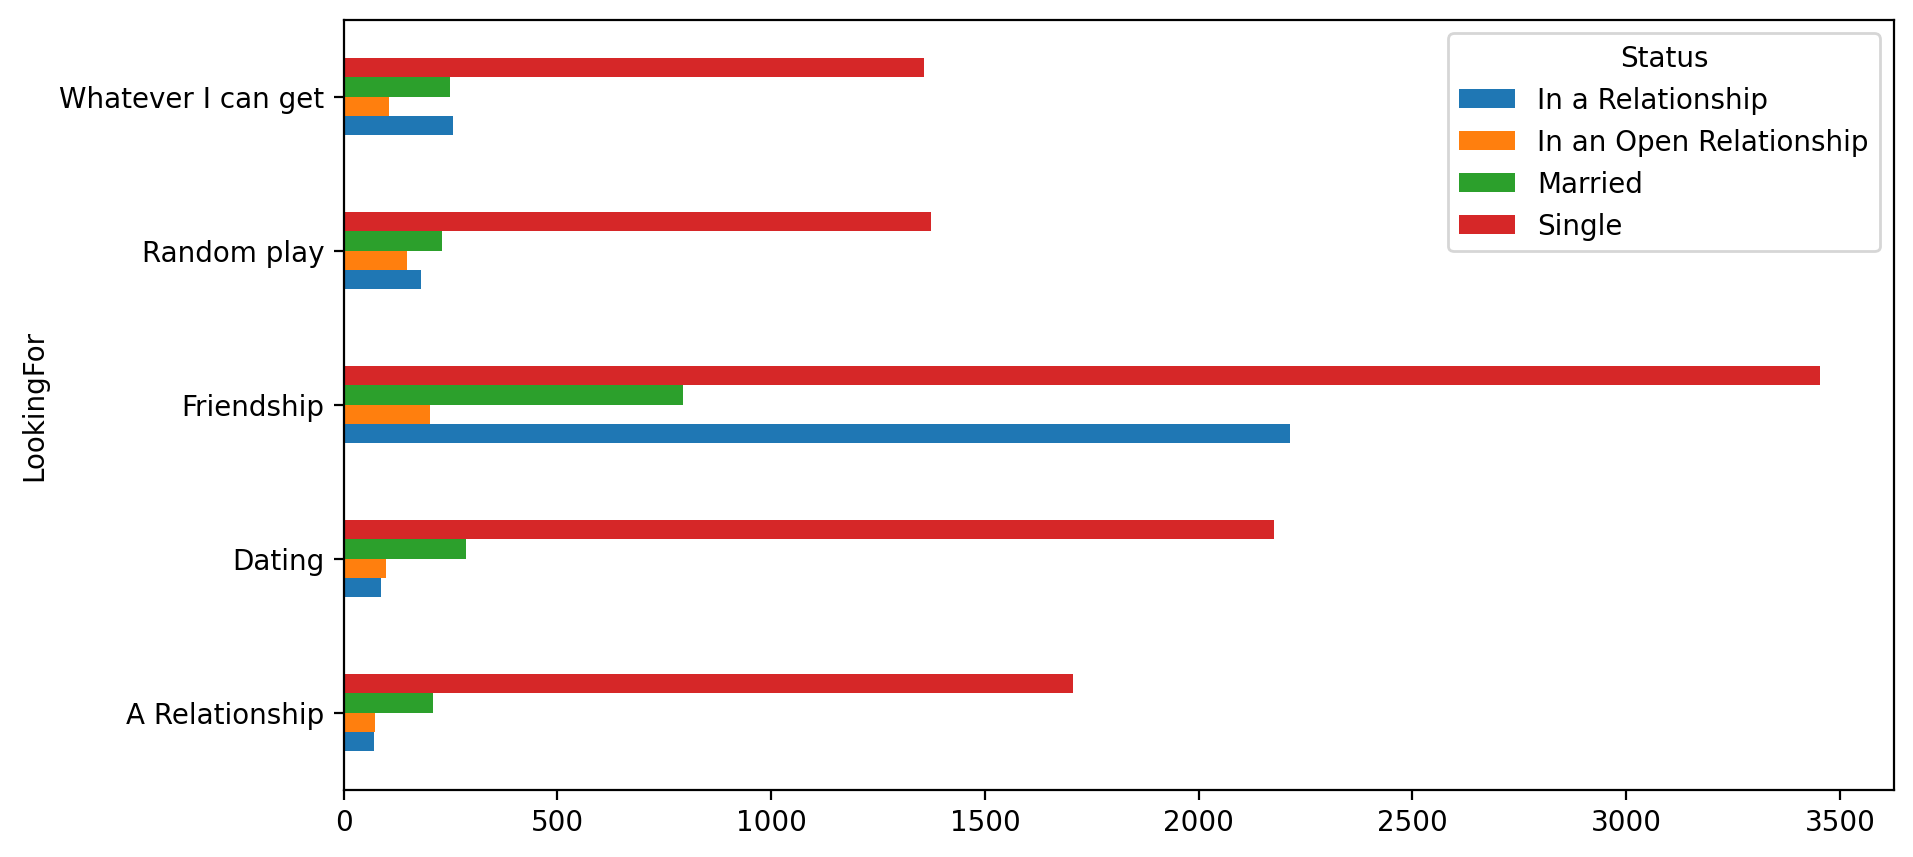

In [ ]:
# Raw numbers, by looking for (taking the transpose)
pivot.T.plot(kind='barh', figsize=(10,5))

In [ ]:
# Every column (LookingFor) sums up to 1
normed1 = pivot / pivot.sum()
normed1

LookingFor,A Relationship,Dating,Friendship,Random play,Whatever I can get
Status,,,,,
In a Relationship,0.034918,0.033208,0.332282,0.094057,0.129639
In an Open Relationship,0.035887,0.037358,0.030180,0.077003,0.054398
Married,0.101843,0.107925,0.119069,0.119380,0.126080
Single,0.827352,0.821509,0.518468,0.709561,0.689883


<Axes: ylabel='LookingFor'>

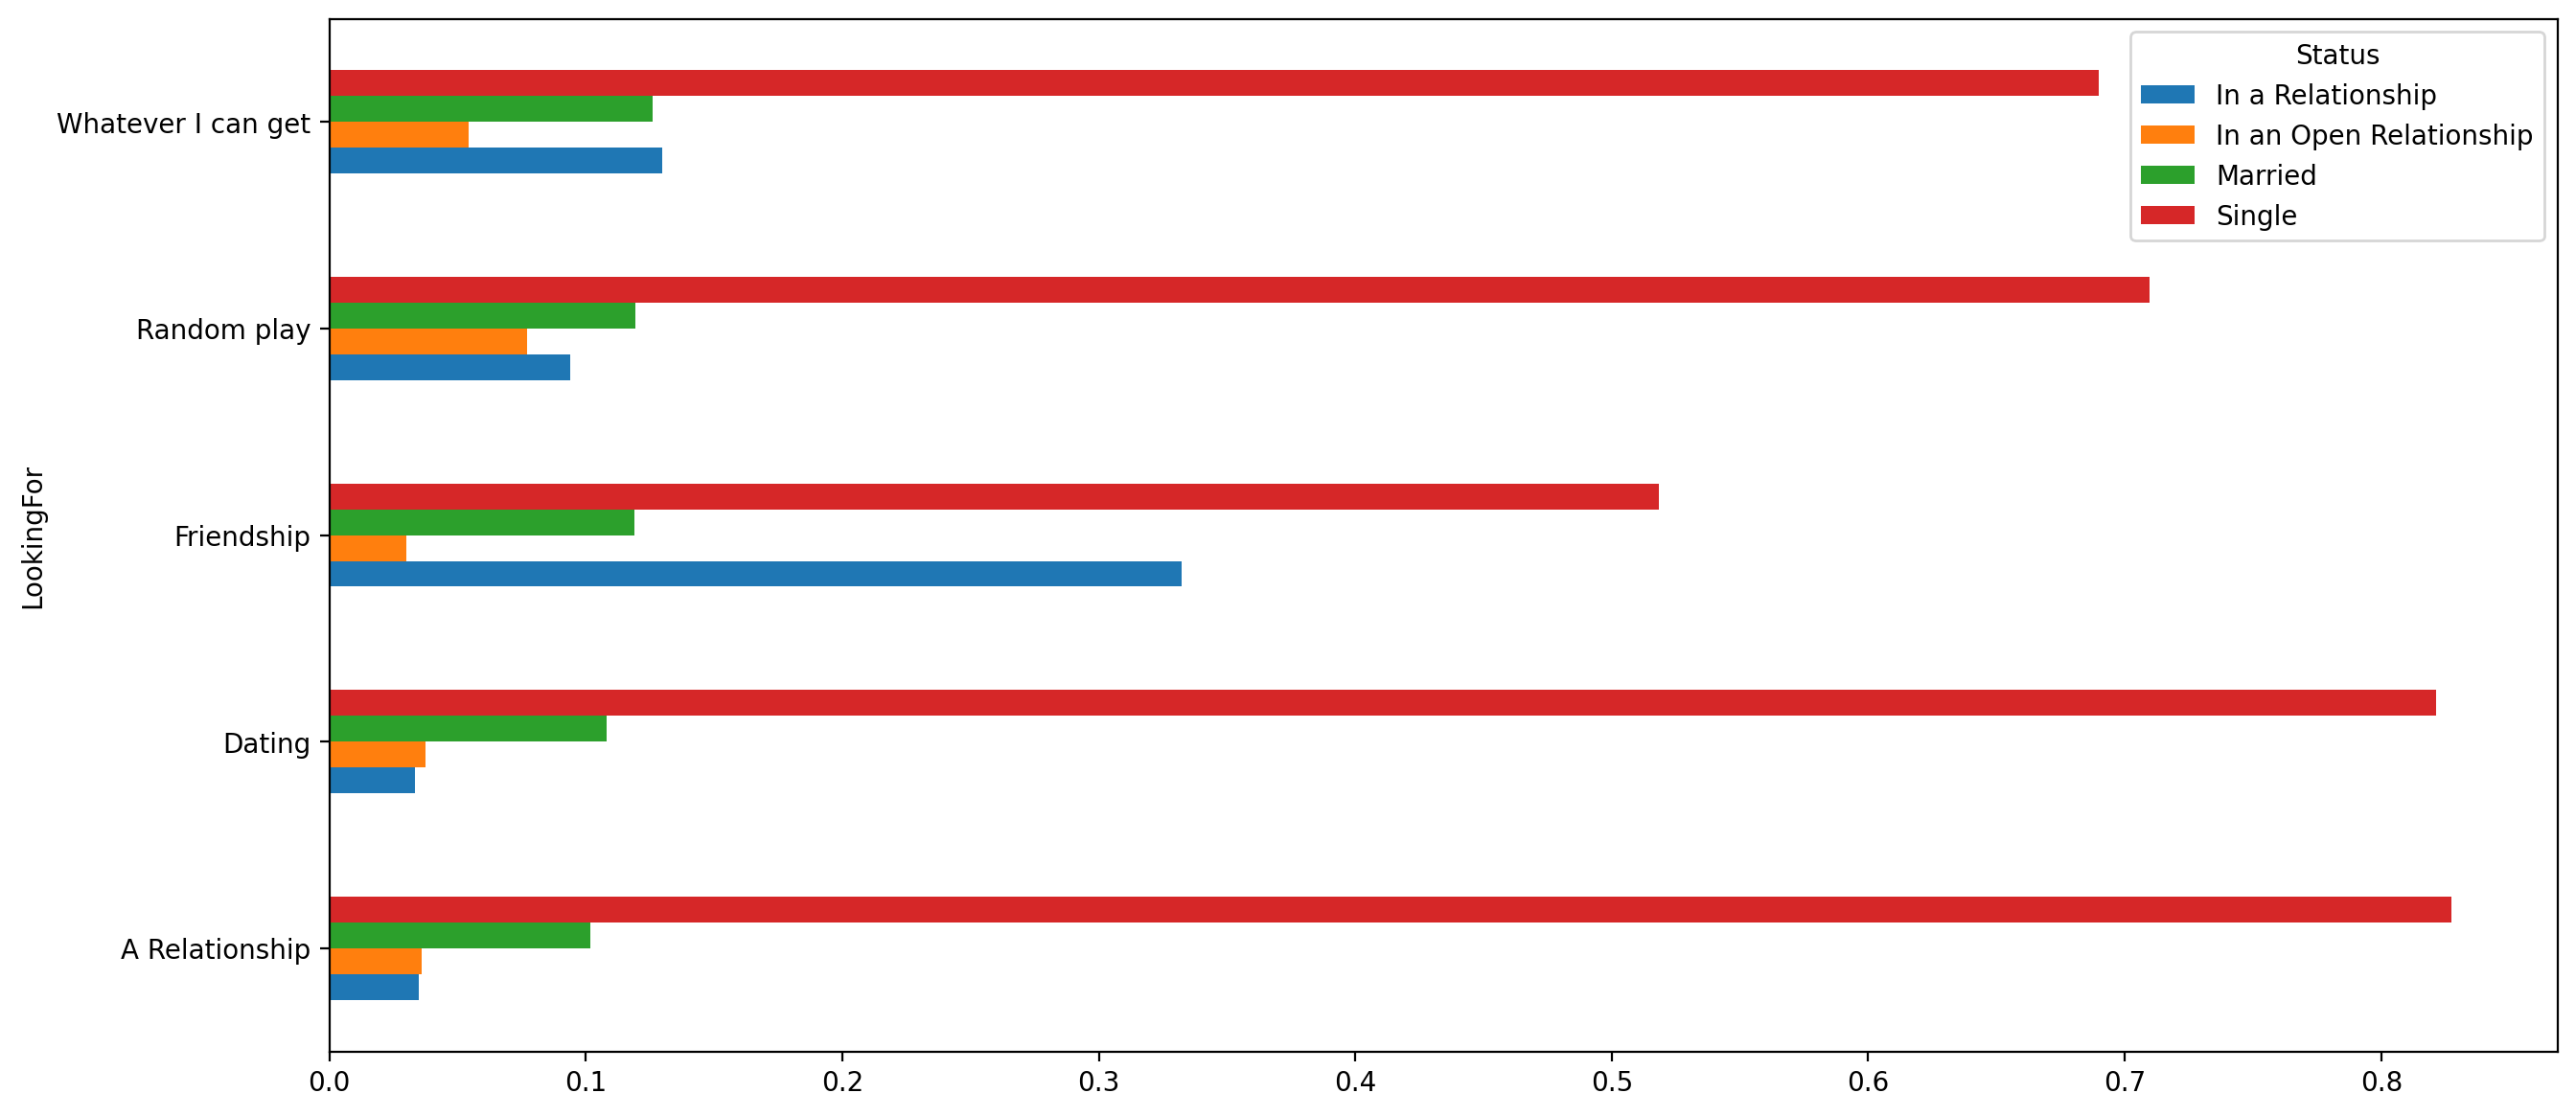

In [ ]:
# For every LookingFor value, show the breakdown among relationship statuses
normed1.T.plot.barh()

In [ ]:
# Every column (Status) sums up to 1
normed2 = (pivot.T / pivot.T.sum())
normed2

Status,In a Relationship,In an Open Relationship,Married,Single
LookingFor,,,,
A Relationship,0.025623,0.117460,0.118778,0.169481
Dating,0.031317,0.157143,0.161765,0.216273
Friendship,0.787544,0.319048,0.448529,0.343036
Random play,0.064769,0.236508,0.130656,0.136400
Whatever I can get,0.090747,0.169841,0.140271,0.134810


<Axes: ylabel='Status'>

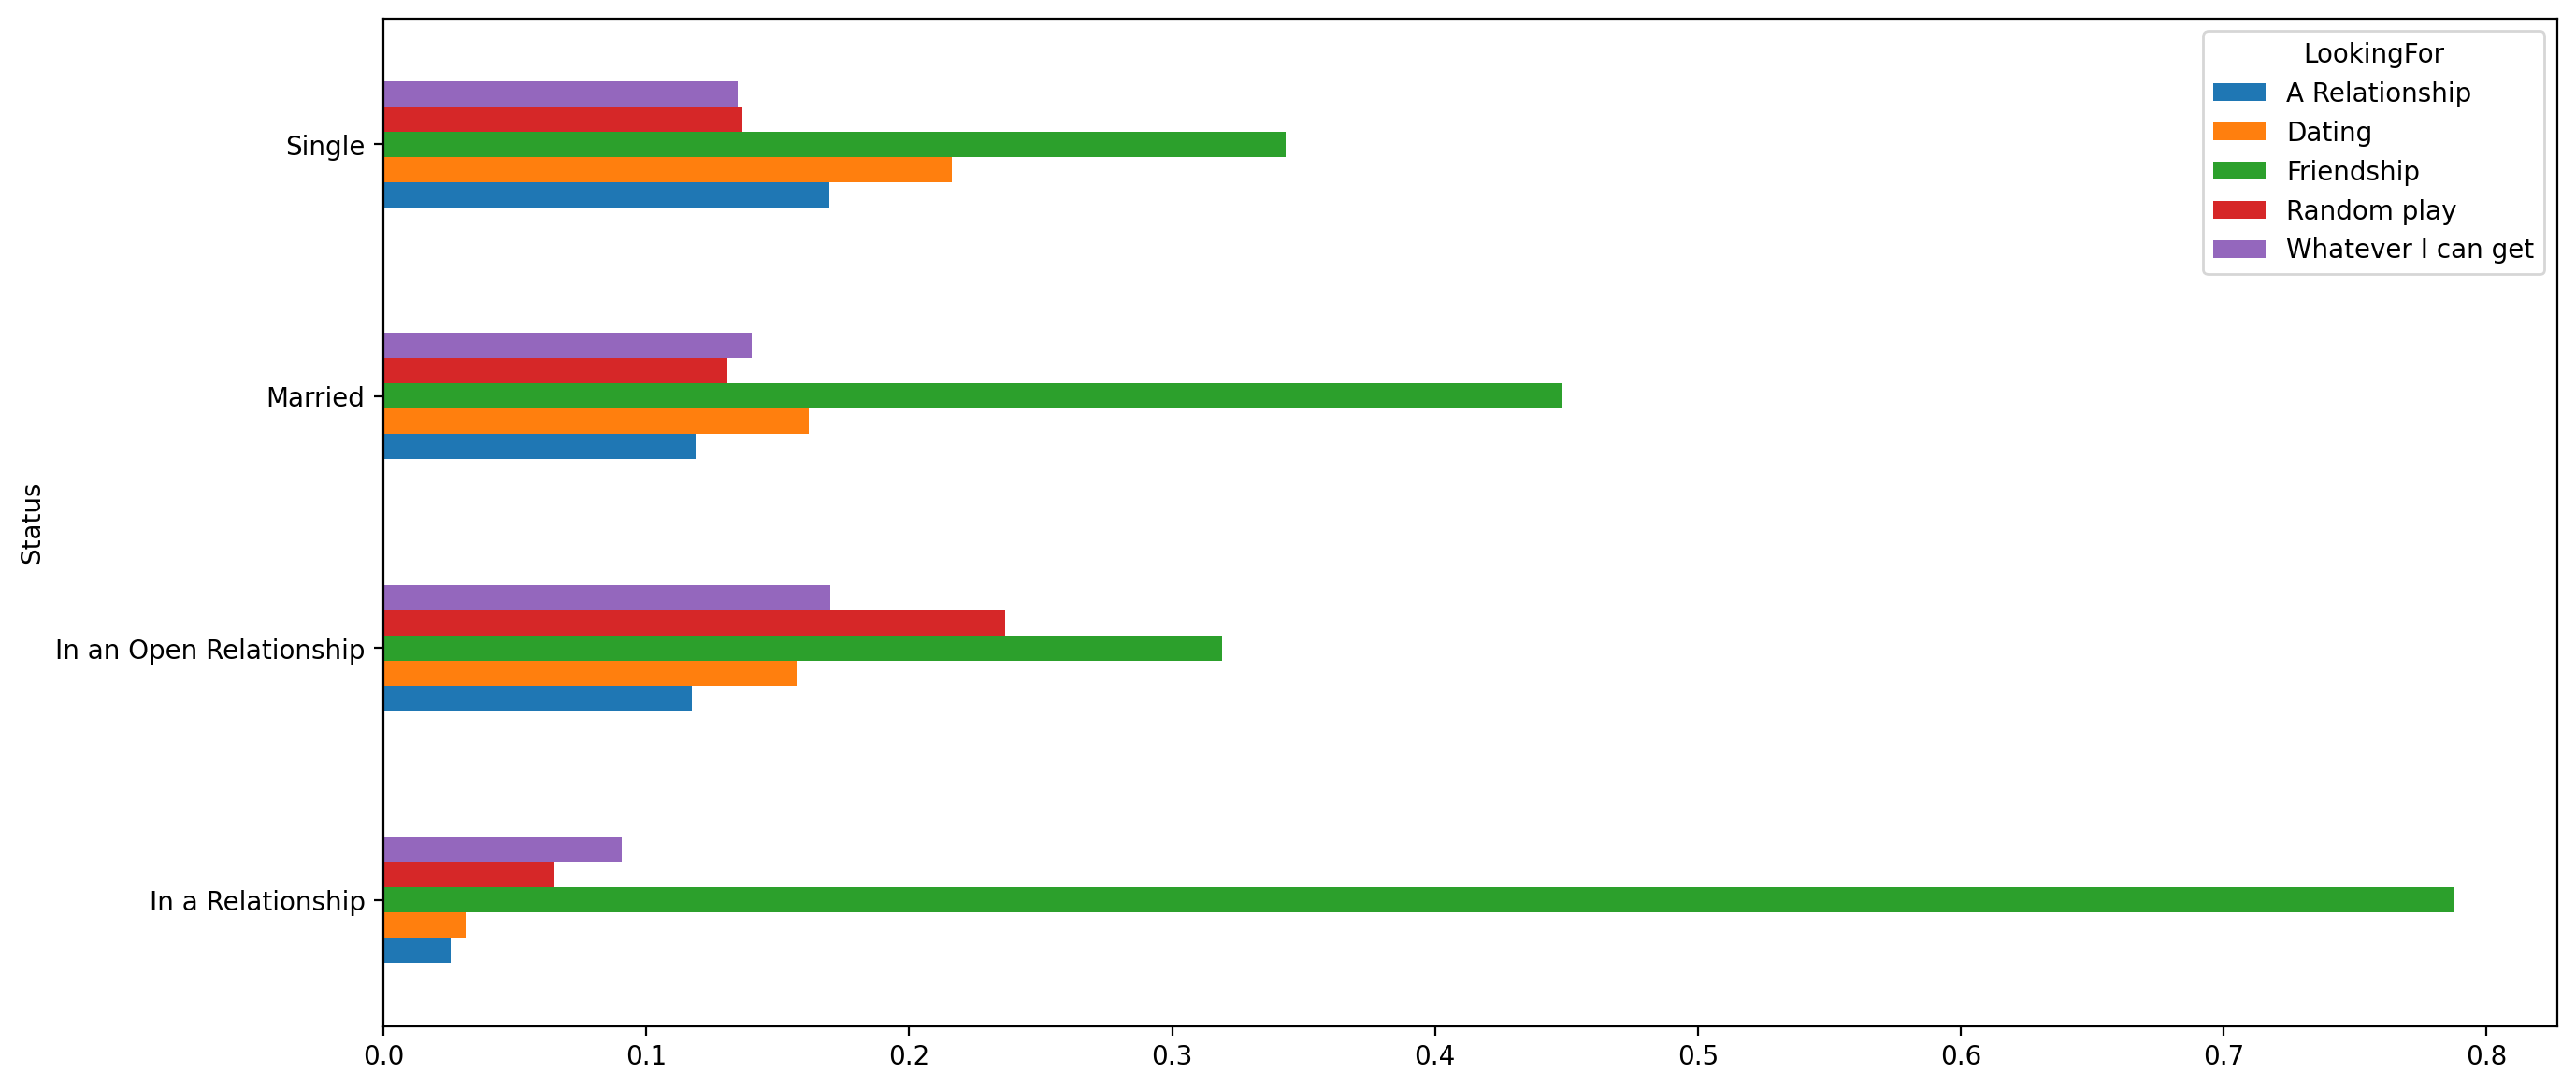

In [ ]:
# For every relationship status, show the breakdown among "LookingFor" values
normed2.T.plot.barh()